In [147]:
!pip install keras_tqdm
!pip install keras.utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [148]:
import numpy as np
import cv2
import os
import pandas as pd
import string
import matplotlib.pyplot as plt

import os
from google.colab import drive 

from keras.preprocessing.sequence import pad_sequences

from keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional
from keras.models import Model
from keras.activations import relu, sigmoid, softmax
import keras.backend as K
#from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras_tqdm import TQDMNotebookCallback

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [149]:
import tensorflow as tf

In [150]:
from tensorflow.python.client import device_lib

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping: no known devices.


In [151]:
drive.mount('/content/gdrive')
with open('gdrive/My Drive/tcs//wordkkk.txt') as f:
    contents = f.readlines()
lines = [line.strip() for line in contents] 
lines[0]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'a01-000u-00-00 ok 154 408 768 27 51 AT A'

In [152]:
max_label_len = 0

char_list = "!\"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz" 
images = []
labels = []

RECORDS_COUNT = 10000
def encode_to_labels(txt):
    dig_lst = []
    for index, chara in enumerate(txt):
        dig_lst.append(char_list.index(chara))
        
    return dig_lst

In [153]:
train_images = []
train_labels = []
train_input_length = []
train_label_length = []
train_original_text = []
valid_images = []
valid_labels = []
valid_input_length = []
valid_label_length = []
valid_original_text = []
inputs_length = []
labels_length = []

converting image to (32,128,1)


In [154]:
def process_image(img):
   
    w, h = img.shape
    new_w = 32
    new_h = int(h * (new_w / w))
    img = cv2.resize(img, (new_h, new_w))
    w, h = img.shape
    
    img = img.astype('float32')
    
    # Converts each to (32, 128, 1)
    if w < 32:
        add_zeros = np.full((32-w, h), 255)
        img = np.concatenate((img, add_zeros))
        w, h = img.shape
    
    if h < 128:
        add_zeros = np.full((w, 128-h), 255)
        img = np.concatenate((img, add_zeros), axis=1)
        w, h = img.shape
        
    if h > 128 or w > 32:
        dim = (128,32)
        img = cv2.resize(img, dim)
    
    img = cv2.subtract(255, img)
    
    img = np.expand_dims(img, axis=2)
    
    
    img = img / 255
    
    return img

In [ ]:
#splits=line.split(' ')
#print(splits)

['a01-020u-07-00', 'ok', '170', '351', '2023', '201', '59', 'PP3OS', 'them']


In [155]:
for index, line in enumerate(lines):
    splits = line.split(' ')
    status = splits[1]
    
    if status == 'ok':
        word_id = splits[0]
        word = "".join(splits[8:])
        
        splits_id = word_id.split('-')
        filepath = 'gdrive/My Drive/tcs/words/{}/{}-{}/{}.png'.format(splits_id[0], 
                                                  splits_id[0], 
                                                  splits_id[1], 
                                                  word_id)
        print(filepath)
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        try:
            img = process_image(img)
        except:
            continue
            
        # processing on label
        try:
            label = encode_to_labels(word)
        except:
            continue
        
        if index % 10 == 0:
            valid_images.append(img)
            valid_labels.append(label)
            valid_input_length.append(31)
            valid_label_length.append(len(word))
            valid_original_text.append(word)
        else:
            train_images.append(img)
            train_labels.append(label)
            train_input_length.append(31)
            train_label_length.append(len(word))
            train_original_text.append(word)
        
        if len(word) > max_label_len:
            max_label_len = len(word)
    
    if index >= RECORDS_COUNT:
        break

#filepath= 'gdrive/My Drive/tcs/words/a01/a01-007/a01-007-00-00.png'
#img=cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

gdrive/My Drive/tcs/words/a01/a01-000u/a01-000u-00-00.png
gdrive/My Drive/tcs/words/a01/a01-000u/a01-000u-00-01.png
gdrive/My Drive/tcs/words/a01/a01-000u/a01-000u-00-02.png
gdrive/My Drive/tcs/words/a01/a01-000u/a01-000u-00-03.png
gdrive/My Drive/tcs/words/a01/a01-000u/a01-000u-00-04.png
gdrive/My Drive/tcs/words/a01/a01-000u/a01-000u-00-05.png
gdrive/My Drive/tcs/words/a01/a01-000u/a01-000u-00-06.png
gdrive/My Drive/tcs/words/a01/a01-000u/a01-000u-01-00.png
gdrive/My Drive/tcs/words/a01/a01-000u/a01-000u-01-01.png
gdrive/My Drive/tcs/words/a01/a01-000u/a01-000u-01-02.png
gdrive/My Drive/tcs/words/a01/a01-000u/a01-000u-01-03.png
gdrive/My Drive/tcs/words/a01/a01-000u/a01-000u-01-04.png
gdrive/My Drive/tcs/words/a01/a01-000u/a01-000u-01-05.png
gdrive/My Drive/tcs/words/a01/a01-000u/a01-000u-02-00.png
gdrive/My Drive/tcs/words/a01/a01-000u/a01-000u-02-01.png
gdrive/My Drive/tcs/words/a01/a01-000u/a01-000u-02-02.png
gdrive/My Drive/tcs/words/a01/a01-000u/a01-000u-02-03.png
gdrive/My Driv

In [156]:
train_padded_label = pad_sequences(train_labels, 
                             maxlen=max_label_len, 
                             padding='post',
                             value=len(char_list))

valid_padded_label = pad_sequences(valid_labels, 
                             maxlen=max_label_len, 
                             padding='post',
                             value=len(char_list))


numpy array

In [157]:
train_images = np.asarray(train_images)
train_input_length = np.asarray(train_input_length)
train_label_length = np.asarray(train_label_length)

valid_images = np.asarray(valid_images)
valid_input_length = np.asarray(valid_input_length)
valid_label_length = np.asarray(valid_label_length)
print(len(train_images))

3889


building neural network


In [158]:
# input with shape of height=32 and width=128 
inputs = Input(shape=(32,128,1))
 
# convolution layer with kernel size (3,3)
conv_1 = Conv2D(64, (3,3), activation = 'relu', padding='same')(inputs)
#  size (2,2)
pool_1 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_1)
 
conv_2 = Conv2D(128, (3,3), activation = 'relu', padding='same')(pool_1)
pool_2 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_2)
 
conv_3 = Conv2D(256, (3,3), activation = 'relu', padding='same')(pool_2)
 
conv_4 = Conv2D(256, (3,3), activation = 'relu', padding='same')(conv_3)

# kernel size (2,1)
pool_4 = MaxPool2D(pool_size=(2, 1))(conv_4)
 
conv_5 = Conv2D(512, (3,3), activation = 'relu', padding='same')(pool_4)

#normalization layer
batch_norm_5 = BatchNormalization()(conv_5)
 
conv_6 = Conv2D(512, (3,3), activation = 'relu', padding='same')(batch_norm_5)
batch_norm_6 = BatchNormalization()(conv_6)
pool_6 = MaxPool2D(pool_size=(2, 1))(batch_norm_6)
 
conv_7 = Conv2D(512, (2,2), activation = 'relu')(pool_6)
 
squeezed = Lambda(lambda x: K.squeeze(x, 1))(conv_7)
 
# bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(LSTM(256, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(256, return_sequences=True, dropout = 0.2))(blstm_1)
 
outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)

# model to be used at test time
act_model = Model(inputs, outputs)

In [159]:
#loss function
the_labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, the_labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, the_labels, input_length, label_length], outputs=loss_out)

training model


In [161]:
batch_size = 8
epochs = 15
e = str(epochs)
optimizer_name = 'sgd'


In [163]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = optimizer_name, metrics=['accuracy'])

filepath="gdrive/My Drive/Colab Notebooks/handwriting/Model/{}o-{}r-{}e-{}t-{}v.hdf5".format(optimizer_name,
                                          str(RECORDS_COUNT),
                                          str(epochs),
                                          str(train_images.shape[0]),
                                          str(valid_images.shape[0]))

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [164]:
history = model.fit(x=[train_images, train_padded_label, train_input_length, train_label_length],
                    y=np.zeros(len(train_images)),
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=([valid_images, valid_padded_label, valid_input_length, valid_label_length], [np.zeros(len(valid_images))]),
                    verbose=2,
                    callbacks=callbacks_list)

Epoch 1/15

Epoch 1: val_loss improved from inf to 26.71297, saving model to gdrive/My Drive/Colab Notebooks/handwriting/Model/sgdo-10000r-15e-3889t-434v.hdf5
487/487 - 687s - loss: 16.5491 - accuracy: 0.0000e+00 - val_loss: 26.7130 - val_accuracy: 0.0000e+00 - 687s/epoch - 1s/step
Epoch 2/15

Epoch 2: val_loss improved from 26.71297 to 15.58162, saving model to gdrive/My Drive/Colab Notebooks/handwriting/Model/sgdo-10000r-15e-3889t-434v.hdf5
487/487 - 625s - loss: 14.4754 - accuracy: 0.0000e+00 - val_loss: 15.5816 - val_accuracy: 0.0000e+00 - 625s/epoch - 1s/step
Epoch 3/15

Epoch 3: val_loss improved from 15.58162 to 14.71109, saving model to gdrive/My Drive/Colab Notebooks/handwriting/Model/sgdo-10000r-15e-3889t-434v.hdf5
487/487 - 630s - loss: 13.0956 - accuracy: 0.0077 - val_loss: 14.7111 - val_accuracy: 0.0346 - 630s/epoch - 1s/step
Epoch 4/15

Epoch 4: val_loss did not improve from 14.71109
487/487 - 631s - loss: 11.8086 - accuracy: 0.0296 - val_loss: 36.3765 - val_accuracy: 0.0

KeyboardInterrupt: ignored

KeyboardInterrupt: ignored

test the model

In [165]:
!pip install python-levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [166]:
act_model.load_weights(filepath)

# predict outputs on validation images
prediction = act_model.predict(valid_images)
 
# use CTC decoder
decoded = K.ctc_decode(prediction, 
                       input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                       greedy=True)[0][0]
out = K.get_value(decoded)

import Levenshtein as lv

total_jaro = 0
total_rati = 0
# see the results
for i, x in enumerate(out):
    letters=''
    for p in x:
        if int(p) != -1:
            letters+=char_list[int(p)]
    total_jaro+=lv.jaro(letters, valid_original_text[i])
    total_rati+=lv.ratio(letters, valid_original_text[i])

print('jaro :', total_jaro/len(out))
print('ratio:', total_rati/len(out))


jaro : 0.7954150464231109
ratio: 0.7269627852825681


pridicting words


original_text =   United
predicted text = Lited

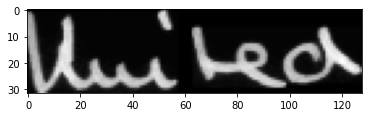



original_text =   National
predicted text = National

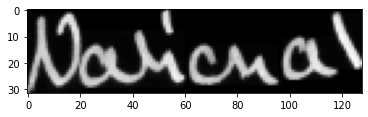



original_text =   Independence
predicted text = mdependence

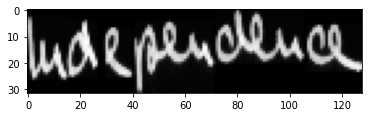



original_text =   Party
predicted text = Porty

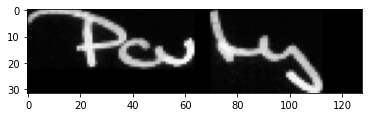



original_text =   280,000
predicted text = 200ooo

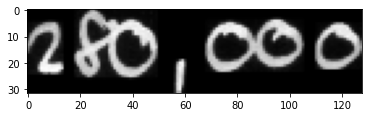



original_text =   members
predicted text = member

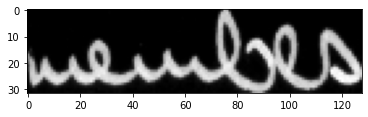



original_text =   )
predicted text = ,

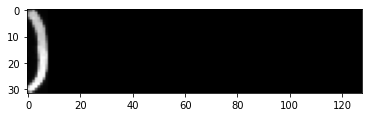



original_text =   and
predicted text = a

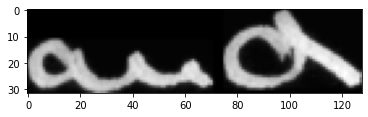



original_text =   Mr.
predicted text = Mr.

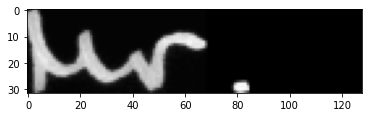



original_text =   Harry
predicted text = tarry

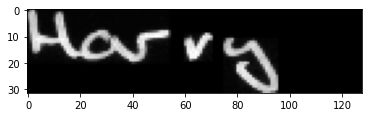



original_text =   Nkumbula's
predicted text = Mumoula's

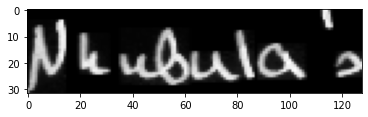



original_text =   African
predicted text = Africon

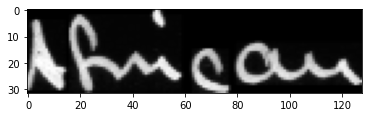



original_text =   National
predicted text = Nodional

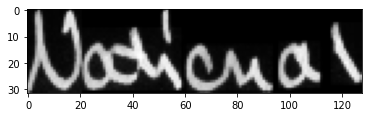



original_text =   (
predicted text = ,

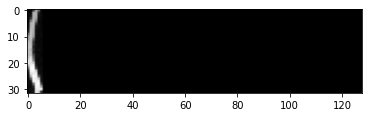



original_text =   400,000
predicted text = No0oo0

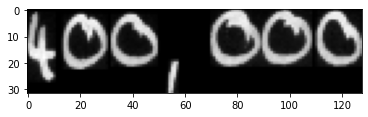



original_text =   )
predicted text = ,

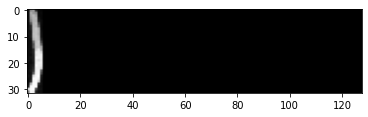



original_text =   will
predicted text = will

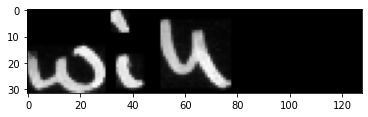



original_text =   meet
predicted text = meet

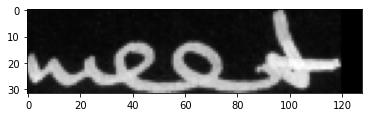



original_text =   in
predicted text = in

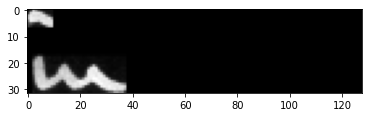



original_text =   London
predicted text = London

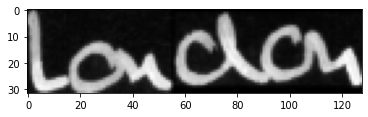



original_text =   today
predicted text = today

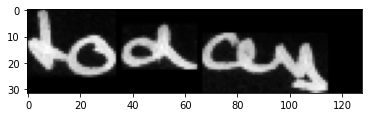



original_text =   to
predicted text = to

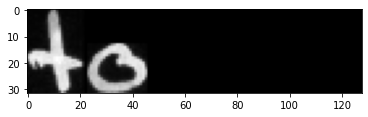



original_text =   a
predicted text = a

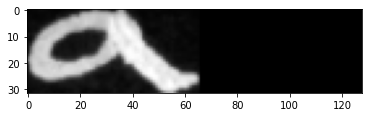



original_text =   common
predicted text = comuol

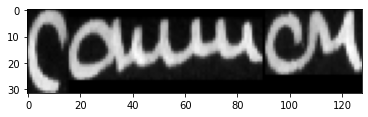



original_text =   course
predicted text = couuroe

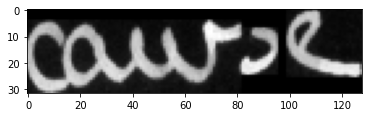



original_text =   of
predicted text = of

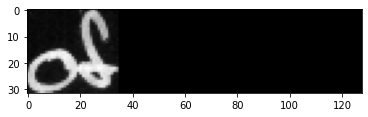



original_text =   action
predicted text = aotion

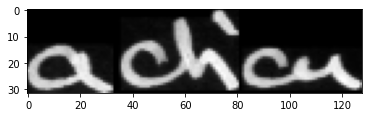



original_text =   .
predicted text = .

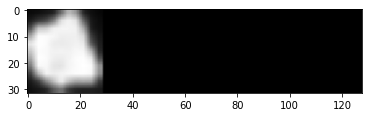



original_text =   Sir
predicted text = Sir

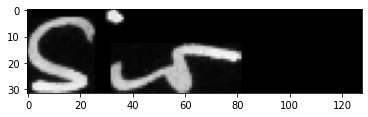



original_text =   Roy
predicted text = Poy

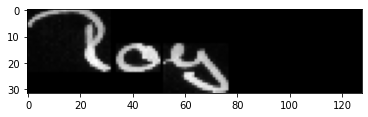



original_text =   is
predicted text = is

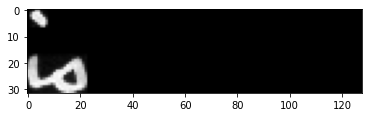



original_text =   opposed
predicted text = oppoped

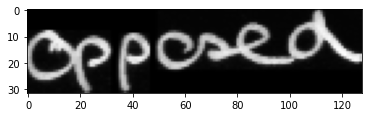



original_text =   to
predicted text = to

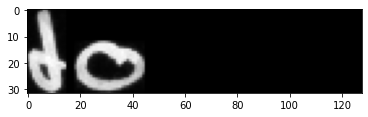



original_text =   Africans
predicted text = ffricans

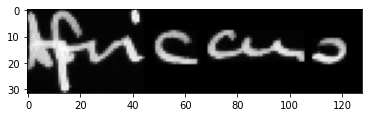



original_text =   getting
predicted text = gting

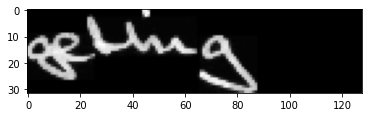



original_text =   an
predicted text = ao

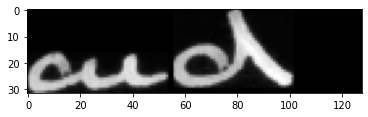



original_text =   elected
predicted text = clected

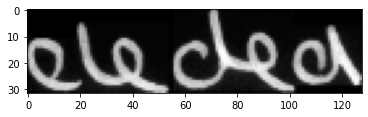



original_text =   majority
predicted text = mgjpritg

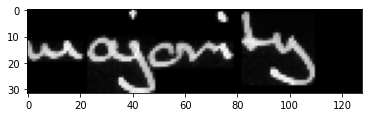



original_text =   in
predicted text = in

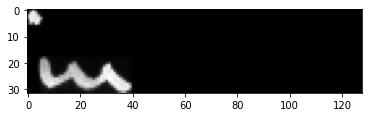



original_text =   Northern
predicted text = Northern

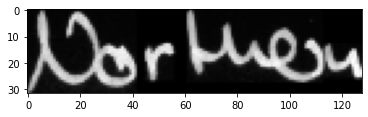



original_text =   ,
predicted text = ,

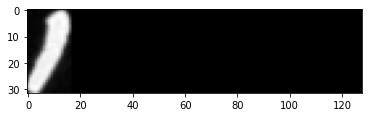



original_text =   but
predicted text = but

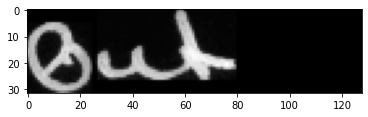



original_text =   the
predicted text = the

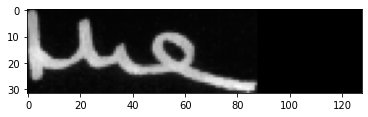



original_text =   Colonial
predicted text = coloial

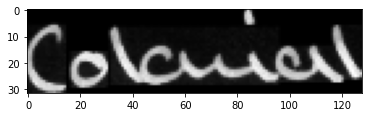



original_text =   Secretary
predicted text = Georetory

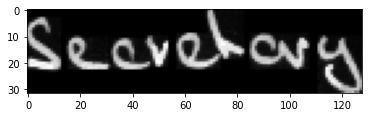



original_text =   ,
predicted text = ,

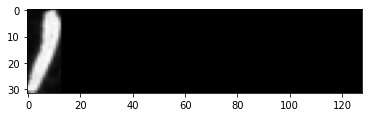



original_text =   Mr.
predicted text = Mr.

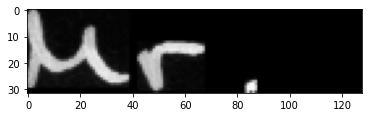



original_text =   Iain
predicted text = hain

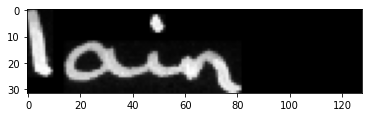



original_text =   Macleod
predicted text = Macleoot

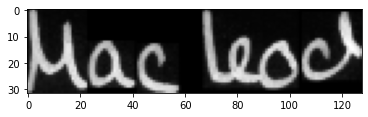



original_text =   is
predicted text = is

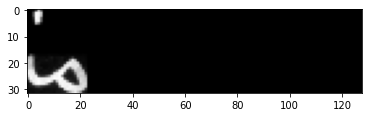



original_text =   insisting
predicted text = insioting

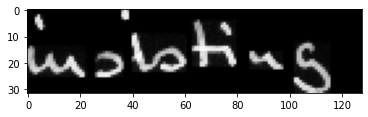



original_text =   on
predicted text = o

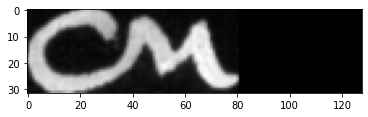



original_text =   a
predicted text = a

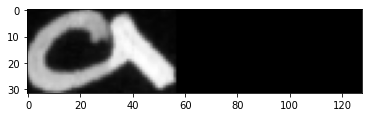



original_text =   policy
predicted text = poliy

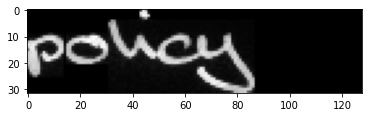



original_text =   of
predicted text = of

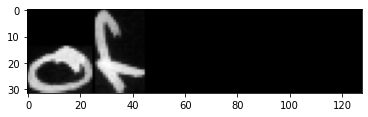



original_text =   change
predicted text = choge

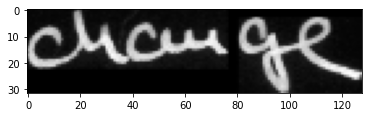



original_text =   .
predicted text = .

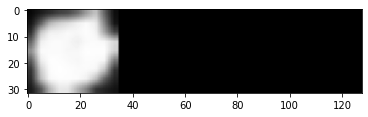



original_text =   Macleod
predicted text = Wclod

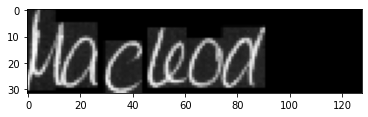



original_text =   ,
predicted text = ,

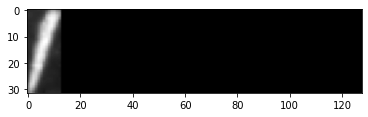



original_text =   is
predicted text = is

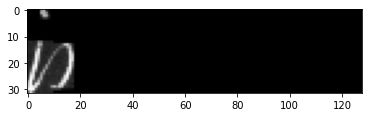



original_text =   on
predicted text = on

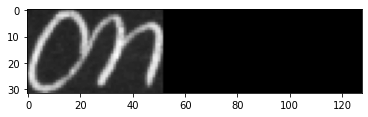



original_text =   a
predicted text = a

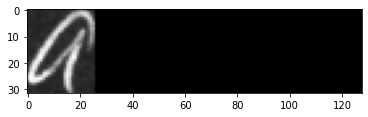



original_text =   policy
predicted text = plgy

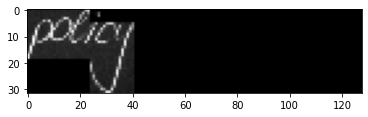



original_text =   of
predicted text = of

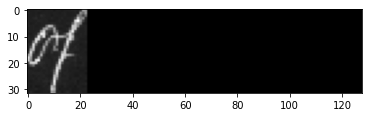



original_text =   change
predicted text = agy

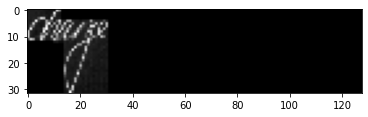



original_text =   .
predicted text = .

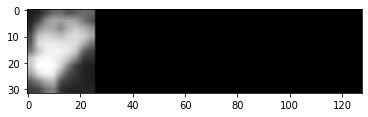



original_text =   Sir
predicted text = Sis

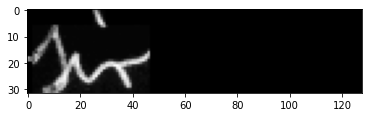



original_text =   Roy's
predicted text = boys

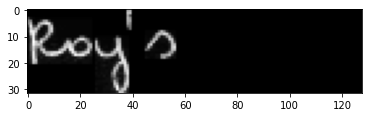



original_text =   United
predicted text = Lited

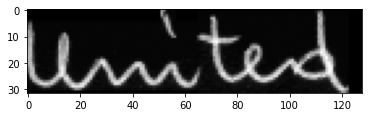



original_text =   Party
predicted text = Roty

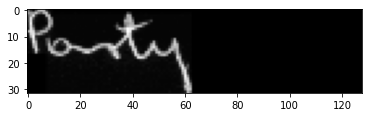



original_text =   is
predicted text = is

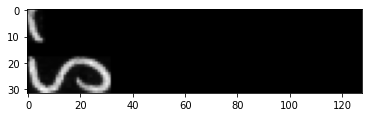



original_text =   boycotting
predicted text = boyeoting

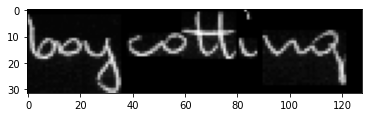



original_text =   the
predicted text = te

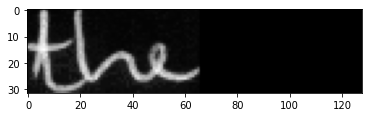



original_text =   London
predicted text = Goudo

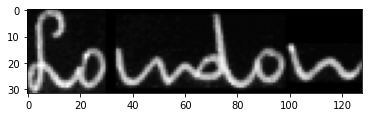



original_text =   talks
predicted text = talorr

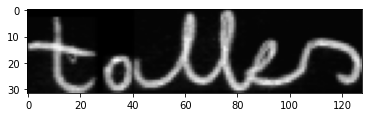

In [167]:
prediction =act_model.predict(train_images[500:575])
 
# use CTC decoder
decoded = K.ctc_decode(prediction,   
                       input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                       greedy=True)[0][0]

out = K.get_value(decoded)

# see the results
for i, x in enumerate(out):
    print("original_text =  ", train_original_text[500+i])
    print("predicted text = ", end = '')
    for p in x:
        if int(p) != -1:
            print(char_list[int(p)], end = '')
    plt.imshow(train_images[500+i].reshape(32,128), cmap=plt.cm.gray)
    plt.show()
    print('\n')

In [168]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

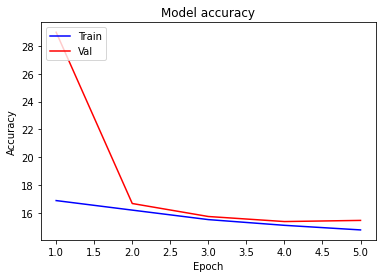

In [169]:
plotgraph(epochs, loss, val_loss)

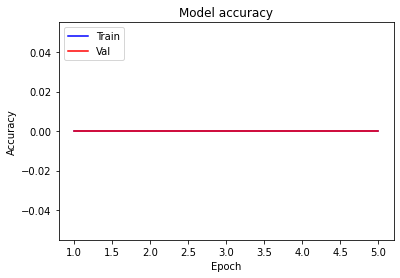

In [170]:
plotgraph(epochs, acc, val_acc)